In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clustered.csv')

In [3]:
EDA_df = pd.read_csv('EDA.csv')

In [4]:
df_cluster = pd.DataFrame(df['five_cluster_label'])
df = pd.concat([EDA_df, df_cluster], axis = 1)

In [5]:
df.groupby(['five_cluster_label']).size()

five_cluster_label
0     8776
1     9991
2     9473
3    13343
4     6561
dtype: int64

Here are the 15 most important features according to random forests:

('pres_Trump', 0.080483152008056558)

 ('repealACA', 0.062965601868580426)
 
 ('Obama', 0.059972521987492131)
 
 ('EPACO2', 0.05909675655173835)
 
 ('Party_Republican', 0.034514679342161181)
 
 ('religimp_Very important', 0.034406689489763401)
 
 ('whiteadvantage_Disagree', 0.031751399814640688)
 
 ('minwage12', 0.029711710814074789)
 
 ('primary', 0.029326002987890738)
 
 ('pew_bornagain', 0.028590703828110658)
 
 ('legalstatusHS', 0.02656161928276991)
 
 ('concealedcarry', 0.025676903616368825)
 
 ('abortionchoice', 0.025564543390386701)
 
 ('Romney', 0.025323456702262652)
 
 ('abortioncoverage', 0.025260245308892072)

 
A lot of these are dummies. If we convert them back to the original variables, we get: pres_vote, repealACA, 2012vote, EPACO2, PartyID, religimp, whiteadvantage, minwage12, primary, pew_bornagain, legalstatusHS, concealedcarry, abortionchoice, abortioncoverage.

In [6]:
#function plotting how respondent's answers to a question (col) grouped by an inputted feature (groupcol)
def cluster_plot(groupcol, col, df, title = '', ordering = [], ylim = 1.1, label = None, legend_x = 1.25):
    cluster_df = df.groupby([groupcol, col]).size() / df.groupby([groupcol]).size()

    cluster_df = cluster_df.to_frame()
    cluster_df = cluster_df.reset_index(level=[0,1])
    cluster_df = cluster_df.pivot(index = groupcol, columns = col, values = 0)
    
    #order the answers within each bar-group if an ordering is specified
    if len(ordering) > 0:
        cluster_df = cluster_df[ordering]
    
    _ = cluster_df.plot(kind = 'bar', rot = 0, figsize = (7,5.5))
    _ = plt.title(title)
    _ = plt.ylim(0, ylim)
    _ = plt.xlabel("Cluster Label")
    _ = plt.legend(bbox_to_anchor=(legend_x, 0.7), labels = label)

    plt.show()

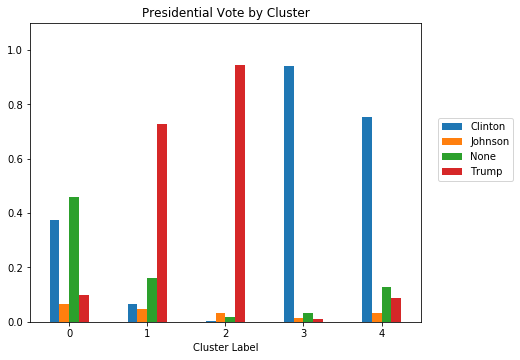

In [7]:
#exclude Other, McMullin, and Stein due to small number of responses
major_df = df.loc[(df['presvote'] != 'Other') & (df['presvote'] != 'McMullin') & (df['presvote'] != 'Stein')]
cluster_plot('five_cluster_label', 'presvote', major_df, 'Presidential Vote by Cluster')

In [8]:
cluster_df = df.groupby(['five_cluster_label', 'ideo5']).size() / df.groupby(['five_cluster_label']).size()

cluster_df = cluster_df.to_frame()
cluster_df = cluster_df.reset_index(level=[0,1])
cluster_df = cluster_df.pivot(index = 'five_cluster_label', columns = 'ideo5', values = 0)

cluster_df

ideo5,Conservative,Liberal,Moderate or Not sure,Very conservative,Very liberal
five_cluster_label,,,,,
0,0.090360,0.164540,0.679923,0.014129,0.051048
1,0.389651,0.035032,0.468522,0.098088,0.008708
2,0.542595,0.006228,0.168690,0.280798,0.001689
3,0.019786,0.468560,0.239976,0.001424,0.270254
4,0.150739,0.188843,0.559671,0.039018,0.061728


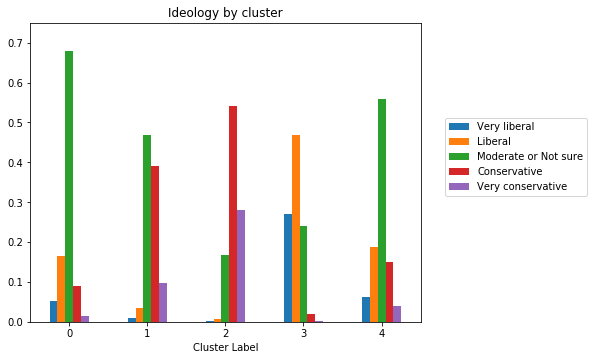

In [9]:
#order ideological answers by left to right
ideo_list = ['Very liberal', 'Liberal', 'Moderate or Not sure', 'Conservative', 'Very conservative']

cluster_plot('five_cluster_label', 'ideo5', df, 'Ideology by cluster', ideo_list, ylim = 0.75, legend_x = 1.05)

0 is largely moderate, with a small number of liberals and a smaller number of conservatives. 1 has a plurality of moderates, with the rest mostly conservative, while 2 is mostly conservative or very conservative. 3 is mostly very liberal or liberal, while 4 is mostly moderate. Note that 4 mostly voted for Clinton.

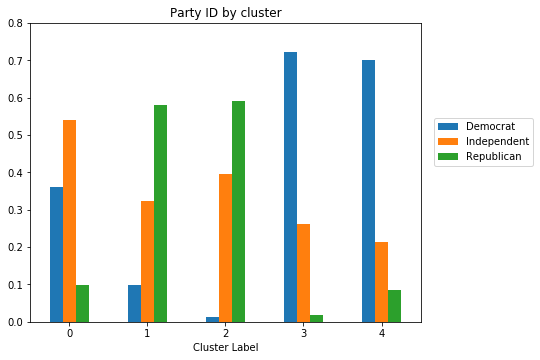

In [31]:
cluster_plot('five_cluster_label', 'partyID', df, 'Party ID by cluster', ylim = 0.8, legend_x = 1.3)

In terms of party ID, 0 is mostly independent, not surprisingly. Interestingly, the differences between 1 and 2 and 3 and 4 manifests in how many identify as the opposite party, not in how many are independent. The more partisan clusters have a higher proportion of independents, but a lower proportion of people from the other party.

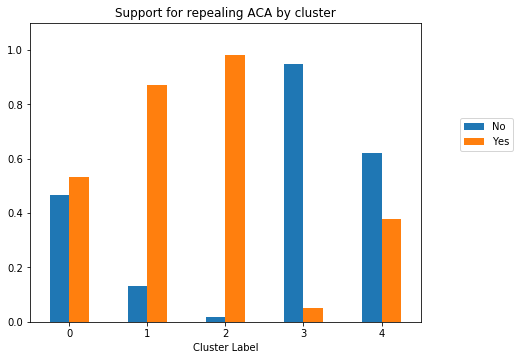

In [11]:
cluster_plot('five_cluster_label', 'repealACA', df, 'Support for repealing ACA by cluster', label = ['No', 'Yes'])

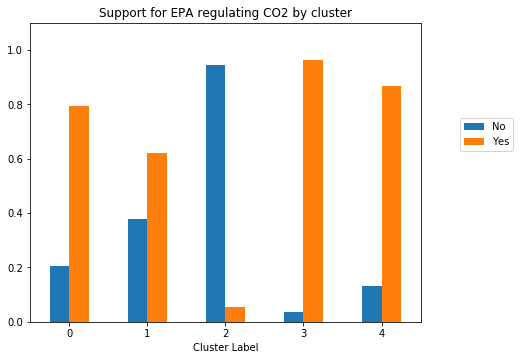

In [12]:
cluster_plot('five_cluster_label', 'EPACO2', df, 'Support for EPA regulating CO2 by cluster', label = ['No', 'Yes'])

There is a stark difference between 1 and 2. This looks to be a big feature dividing the two Trump clusters.

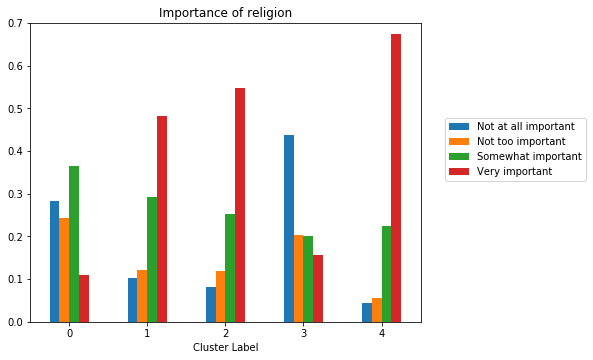

In [13]:
cluster_plot('five_cluster_label', 'pew_religimp', df, 'Importance of religion', ylim = 0.7, legend_x = 1.05)

Question is "how important is religion in your life?". There is a big difference between clusters 3 and 4. These are both Clinton clusters. 0 is not too religious. Trump clusters are both pretty religious.

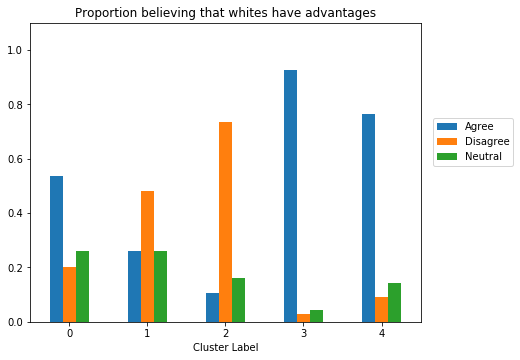

In [14]:
cluster_plot('five_cluster_label', 'whiteadvantage', df, 'Proportion believing that whites have advantages')

The question was "white people in the US have advantages due to the color of their skin - agree or disagree". This looks polarized, with the more conservative Trump cluster disagreeing more, and the more liberal Clinton cluster agreeing more.

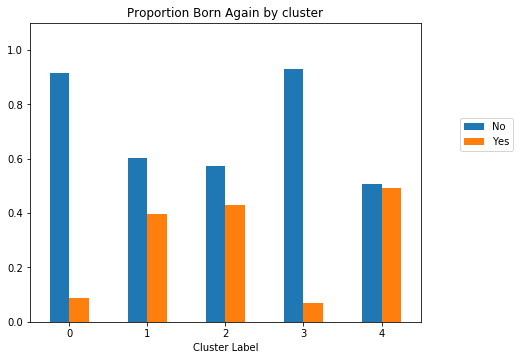

In [15]:
cluster_plot('five_cluster_label', 'pew_bornagain', df, 'Proportion Born Again by cluster', label = ['No', 'Yes'])

4 has the highest proportion of born again respondents, interestingly. 0 has very few born again respondents.

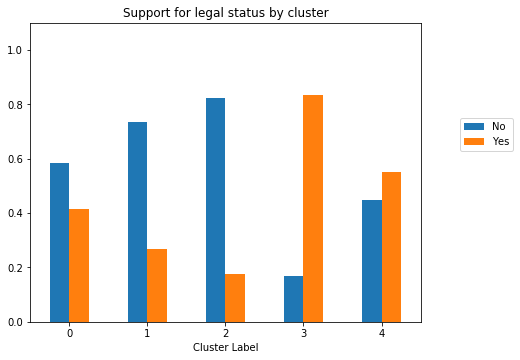

In [16]:
cluster_plot('five_cluster_label', 'legalstatusHS', df, 'Support for legal status by cluster', label = ['No', 'Yes'])

Question was "Grant legal status to people who were brought to the US illegally as children, but who have graduated from a U.S. high school - Yes or No". This is pretty split party-wise. The difference between 3 and 4 is pretty big.

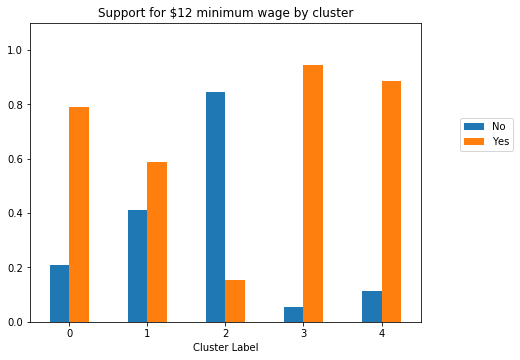

In [17]:
cluster_plot('five_cluster_label', 'minwage12', df, 'Support for $12 minimum wage by cluster', label = ['No', 'Yes'])

Every cluster supports raising the minimum wage except for 2 (the overwhelming conservative one). 1 supports raising the minimum wage by a smaller margin, but nonetheless still supports it.

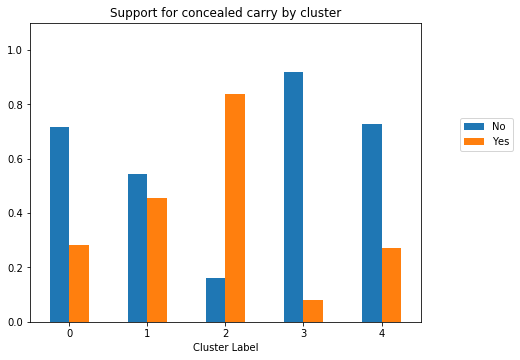

In [18]:
cluster_plot('five_cluster_label', 'concealedcarry', df, 'Support for concealed carry by cluster', label = ['No', 'Yes'])

There is a very big gap in opinion between 1 and 2. Question was "Make it easier for people to obtain concealed-carry permit - Support or Oppose"?

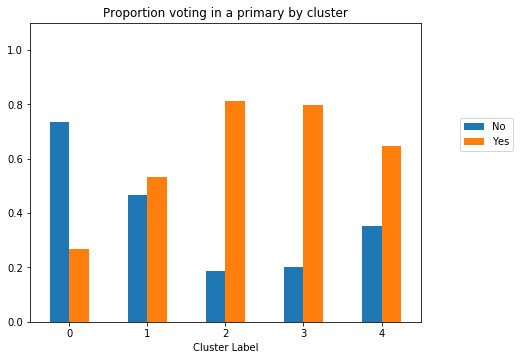

In [19]:
cluster_plot('five_cluster_label', 'primary', df, 'Proportion voting in a primary by cluster', label = ['No', 'Yes'])

Whether they voted in the primary.

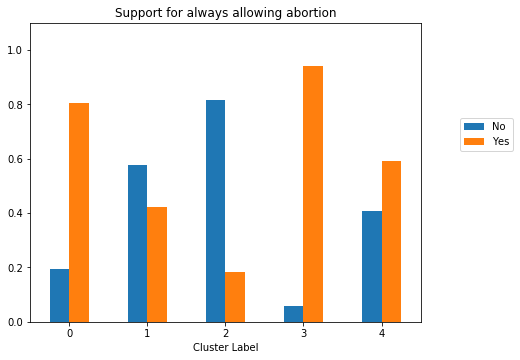

In [20]:
cluster_plot('five_cluster_label', 'abortionchoice', df, 'Support for always allowing abortion', label = ['No', 'Yes'])

This is a big issue dividing the two sets of partisan clusters.

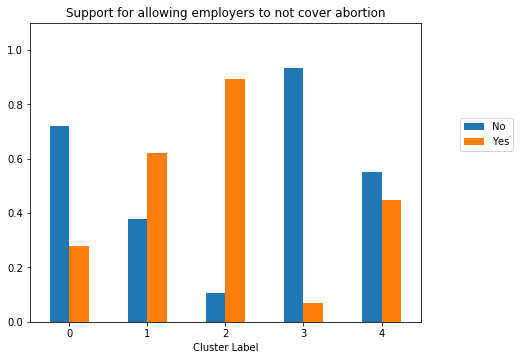

In [21]:
cluster_plot('five_cluster_label', 'abortioncoverage', df, 'Support for allowing employers to not cover abortion', label = ['No', 'Yes'])

Question is - "Allow employers to decline coverage of abortions in insurance plans" - support or oppose?. Similar results to above.

## other questions

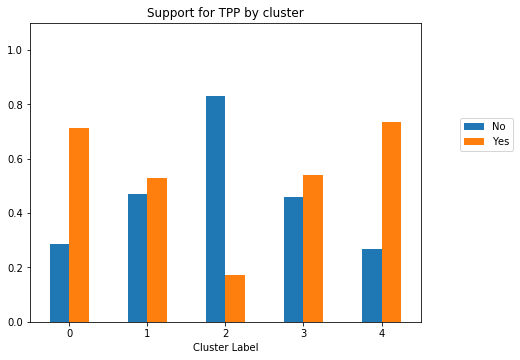

In [22]:
cluster_plot('five_cluster_label', 'TPP', df, 'Support for TPP by cluster', label = ['No', 'Yes'])

Every cluster supports the TPP (Trans-Pacific partnership, a trade agreement negotiated between the US and several Asian countries which Trump withdrew from in 2017) except for 2. Interestingly, the most liberal cluster (3) is less likely to support the TPP than the less liberal Clinton cluster (4). This likely reflects a split that occurred during the Democratic primary, wherein Bernie Sanders was vocally opposed to the TPP while Clinton was more ambivalent. Unfortunately, this dataset does not contain information on whom the respondents voted for in the primary.

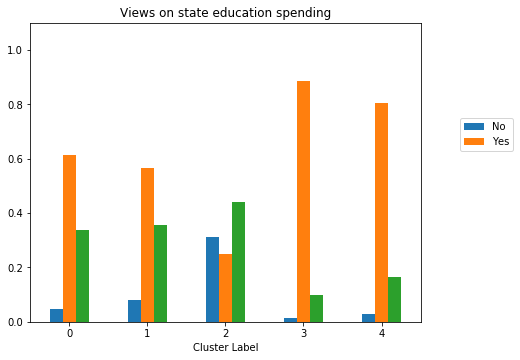

In [23]:
cluster_plot('five_cluster_label', 'stateedu', df, 'Views on state education spending', label = ['No', 'Yes'])

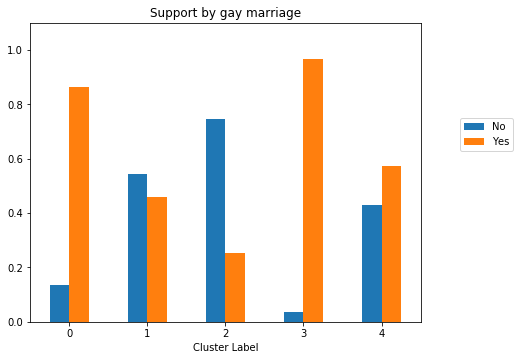

In [24]:
cluster_plot('five_cluster_label', 'gaymarriage', df, 'Support by gay marriage', label = ['No', 'Yes'])

## demographics

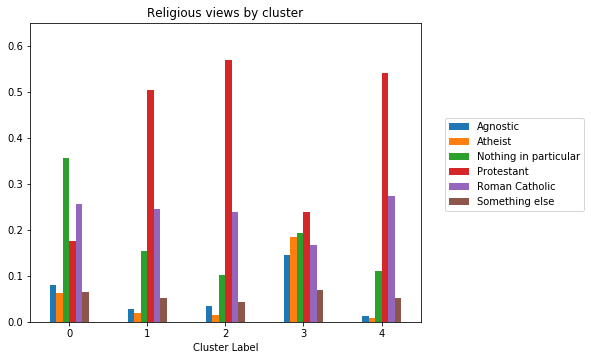

In [25]:
#restrict to most common answers
relig_df = df.loc[(df['religpew'] == 'Agnostic') | (df['religpew'] == 'Atheist') | (df['religpew'] == 'Nothing in particular')
                 | (df['religpew'] == 'Protestant') | (df['religpew'] == 'Roman Catholic') | (df['religpew'] == 'Something else')]

cluster_plot('five_cluster_label', 'religpew', relig_df, 'Religious views by cluster', ylim = 0.65, legend_x = 1.05)

Plurality is Protestant for all clusters except 0, which has a plurality saying Nothing in Particular. 4 is way more Protestant, and more Catholic than 3. 3 has the most atheist and agnostic respondents.

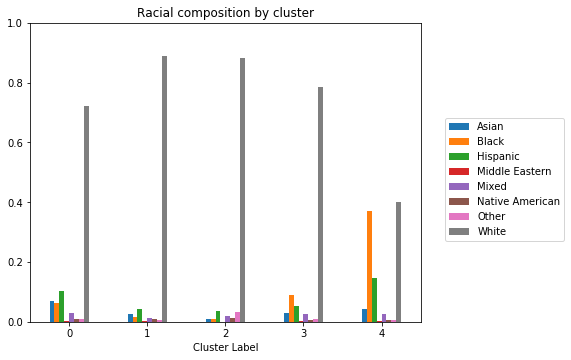

In [26]:
cluster_plot('five_cluster_label', 'race', df, 'Racial composition by cluster', ylim = 1, legend_x = 1.05)

AYYYY

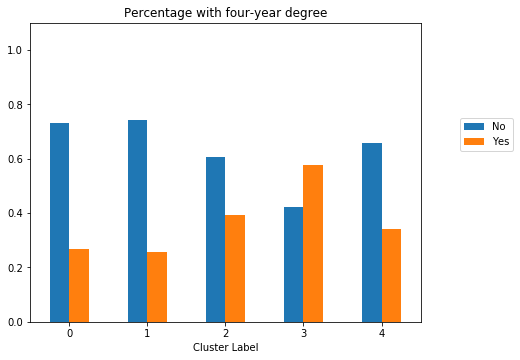

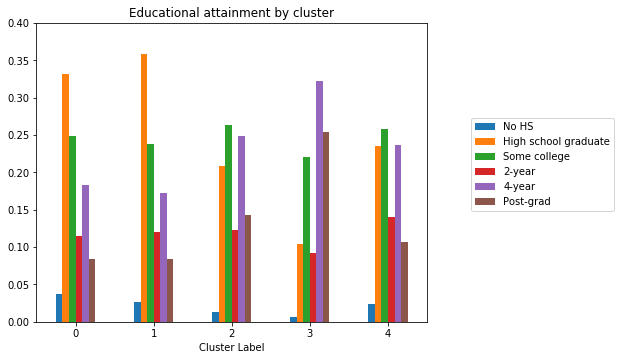

In [27]:
educations = ['No HS', 'High school graduate', 'Some college', '2-year', '4-year', 'Post-grad']

cluster_plot('five_cluster_label', 'college', df, 'Percentage with four-year degree', label = ['No', 'Yes'])
cluster_plot('five_cluster_label', 'educ', df, 'Educational attainment by cluster', ylim = 0.4, ordering = educations, legend_x = 1.1)

3 is the most educated, followed by 2. 0 and 1 are close contenders for last place in terms of how many have a college degree.

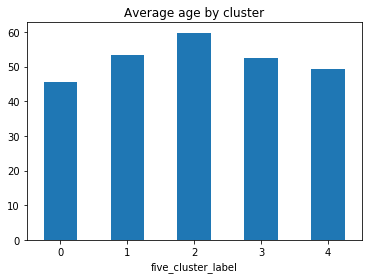

In [28]:
ages = df.groupby(['five_cluster_label'])['age'].mean()
_ = ages.plot(kind = 'bar', rot = 0, title = 'Average age by cluster')
plt.show()

0 is youngest of all. 2 is older than 1. 3 is older than 4. So within those clusters, the more ideologically extreme one tends to be older.

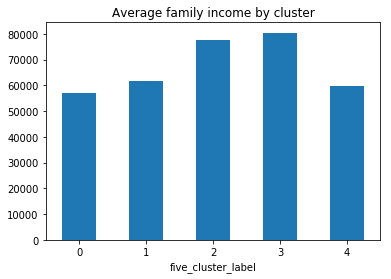

In [32]:
incomes = df.groupby(['five_cluster_label'])['faminc'].mean()
_ = incomes.plot(kind = 'bar', rot = 0, title = 'Average family income by cluster')
plt.show()

0 and 4 have the lowest incomes, followed by 1. 2 and 3 (the highly conservative/highly liberal clusters) have the highest incomes.

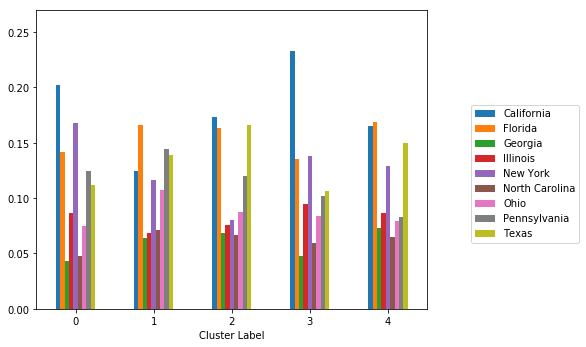

In [30]:
states = ['California','Texas','Florida', 'New York','Pennsylvania','Illinois','Ohio','Georgia','North Carolina']
states_df = df[df['inputstate_post'].isin(states)]

cluster_plot('five_cluster_label', 'inputstate_post', states_df, ylim = 0.27, legend_x = 1.1)

Showing the 10 US states with the highest population. The more liberal clusters tend to inhabit more liberal states.